### Описание датасета
-  Регион - субъект Российской Федерации, где находится медицинское учреждение
-  Календарный_год - год
-  Период - месяц
-  gender - пол респондента
-  poselenie - ответ на вопрос "Вы постоянно проживаете в городе или в сельской местности?"
-  Населенный_пункт - название населенного пункта, где находится медицинское учреждение
-  org_type - ответ на вопрос "В каких организациях Вы обычно получаете медицинскую помощь?"
-  last_visit - ответ на вопрос "Как давно Вы в последний раз получали медицинскую помощь?"
-  time_of_register - ответ на вопрос "Насколько Вы согласны с утверждением, что сейчас Вы можете записаться к врачу в удобное для Вас время?" (1-5 баллы по 5-бальной шкале)
-  wait_time - ответ на вопрос "Насколько Вы удовлетворены длительностью ожидания медицинской услуги с момента возникновения потребности в медицинской помощи до момента ее получения?" (1-5 баллы по 5-бальной шкале)
-  near_cab - ответ на вопрос "Насколько Вы удовлетворены длительностью ожидания непосредственно перед кабинетом?" (1-5 баллы по 5-бальной шкале)
-  comfort - ответ на вопрос "Насколько комфортным было Ваше пребывание в медицинской организации (комфортность зон ожидания, комфортное перемещение внутри медицинской организации)?" (1-5 баллы по 5-бальной шкале)
-  attitude - ответ на вопрос "Насколько Вы удовлетворены отношением к Вам со стороны медицинского персонала (врачи, мед. сестры, регистраторы, санитары)?" (1-5 баллы по 5-бальной шкале)
-  explain - ответ на вопрос "Удовлетворены ли Вы тем, как врач объяснял Вам, зачем назначено то или иное лечение, лекарственный препарат, диагностическая процедура?" (1-5 баллы по 5-бальной шкале)
-  expect - ответ на вопрос "Насколько результат Вашего обращения в медицинскую организацию соответствовал Вашим ожиданиям?" (1-5 баллы по 5-бальной шкале)
-  loyalty - ответ на вопрос "Вы бы посоветовали близким друзьям или родственникам обращаться за медицинской помощью в Вашу медицинскую организацию?" (1-5 баллы по 5-бальной шкале)
-  gen_sat - ответ на вопрос "Оцените, насколько в целом Вы удовлетворены медицинской помощью?" (1-5 баллы по 5-бальной шкале)
-  open_question_1 - ответ на вопрос "Что Вы можете назвать наибольшей проблемой в процессе получения медицинской помощи в медицинской организации, в которой Вы получаете медицинскую помощь?"
-  open_question_2 - ответ на вопрос "Что Вы можете назвать наибольшей проблемой в процессе получения медицинской помощи в регионе, в котором Вы проживаете?"
-  date_of_survey - дата опроса
-  respondent_number - номер респондента
-  doctor_domestic_visit_problem - ответ на вопрос "Возникали ли у Вас сложности при вызове врача на дом?"
-  diag_services_available - ответ на вопрос "Можете ли Вы получить при оказании первичной медико-санитарной помощи в Вашей медицинской организации диагностические и лабораторные услуги?"
-  disabled_facilitites_available - ответ на вопрос "Есть ли в Вашей медицинской организации приспособления для лиц с ограниченными возможностями?
-  problem_solved - ответ на вопрос "Была ли решена Ваша медицинская проблема?"

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import mlflow
import mlflow.sklearn
import os
from datetime import datetime
from category_encoders import TargetEncoder
from category_encoders.wrapper import PolynomialWrapper
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [25]:
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [26]:
from tqdm import tqdm
tqdm.pandas()

In [27]:
df = pd.read_csv('Anketa_full_v2.csv', on_bad_lines='warn', sep=';')
df.shape

C:\Users\a.golub\AppData\Local\Temp\ipykernel_12436\3773066104.py:1: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Anketa_full_v2.csv', on_bad_lines='warn', sep=';')


(1299502, 29)

#### EDA

In [28]:
# Пропуски
print("\n🔍 Пропущенные значения:\n", df.isnull().sum())


🔍 Пропущенные значения:
 Id                                      0
Регион                                  0
Календарный_год                         0
Период                                  0
gender                                  1
poselenie                               1
Населенный_пункт                      708
org_type                            39367
last_visit                          39690
time_of_register                    39342
wait_time                           39334
near_cab                            39336
comfort                             39336
attitude                            39343
explain                             39343
expect                              39399
loyalty                             39443
gen_sat                                19
open_question_1                    215558
open_question_2                    253316
date_of_survey                          3
respondent_number                    1563
doctor_domestic_visit_problem       83134
diag_ser

In [29]:
# Целевой признак: problem_solved
df['problem_solved'] = df['problem_solved'].replace(['Да', 'Нет'], ['1', '0'])
# df = df.dropna(subset=['problem_solved'])
# Удаляем столбцы, которые не нужны
df = df.drop(columns=['Id', 'respondent_number', 'Населенный_пункт', 'date_of_survey','drugs_available'])


In [31]:
print("Уникальные значения в 'Период' до маппинга:")
print(df['Период'].unique())

Уникальные значения в 'Период' до маппинга:
['Август' 'Сентябрь' 'Октябрь' 'Ноябрь' 'Декабрь' 'Январь' 'Февраль'
 'Март' 'Июль' 'Апрель' 'Май' 'Июнь']


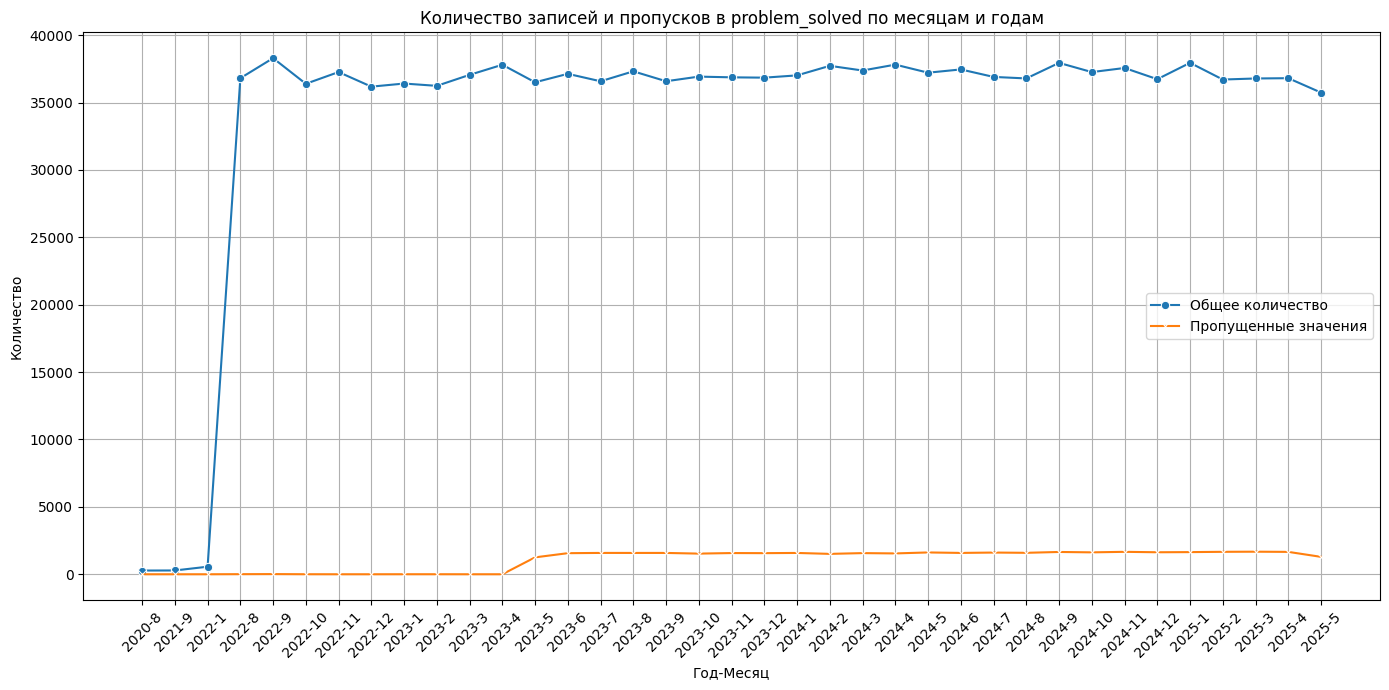

In [32]:
# Посмотрим пропуски в target
period_mapping = {
    'Январь': 1,
    'Февраль': 2,
    'Март': 3,
    'Апрель': 4,
    'Май': 5,
    'Июнь': 6,
    'Июль': 7,
    'Август': 8,
    'Сентябрь': 9,
    'Октябрь': 10,
    'Ноябрь': 11,
    'Декабрь': 12
}

# Применяем маппинг к столбцу 'Период'
df['Период'] = df['Период'].map(period_mapping)

# Группируем данные
grouped_total = df.groupby(['Календарный_год', 'Период'])['problem_solved'].count().rename('total_count')
grouped_missing = df.groupby(['Календарный_год', 'Период'])['problem_solved'].apply(lambda x: x.isnull().sum()).rename('missing_count')

result = pd.concat([grouped_total, grouped_missing], axis=1).reset_index()

result['Year_Month'] = result['Календарный_год'].astype(str) + '-' + result['Период'].astype(str)

# Строим график
plt.figure(figsize=(14, 7))
sns.lineplot(data=result, x='Year_Month', y='total_count', label='Общее количество', marker='o')
sns.lineplot(data=result, x='Year_Month', y='missing_count', label='Пропущенные значения', marker='x')

plt.xticks(rotation=45)
plt.title('Количество записей и пропусков в problem_solved по месяцам и годам')
plt.xlabel('Год-Месяц')
plt.ylabel('Количество')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

# Удаляем ненужные колонки
# df = df.drop(columns=['respondent_number'])
# TODO посмотреть почему много пропусков
# TODO посмотреть есть ли комментарий

In [33]:
# Проверим, может дело в Регионе
# Группировка с учётом региона
grouped_total = df.groupby(['Календарный_год', 'Период', 'Регион'])['problem_solved'].count().rename('total_count')
grouped_missing = df.groupby(['Календарный_год', 'Период', 'Регион'])['problem_solved'].apply(lambda x: x.isnull().sum()).rename('missing_count')

# Объединение результатов
result = pd.concat([grouped_total, grouped_missing], axis=1).reset_index()

# Сортировка для лучшей читаемости
result = result.sort_values(by=['missing_count','Календарный_год', 'Период', 'Регион'],
                            ascending=[False, True, True, True])

# Вывод результата
print("Таблица с количеством записей и пропусков по регионам:")
print(result.to_string(index=False))


Таблица с количеством записей и пропусков по регионам:
 Календарный_год  Период                                   Регион  total_count  missing_count
            2025       3             Донецкая Народная Республика            0            648
            2025       5             Донецкая Народная Республика            0            646
            2025       2             Донецкая Народная Республика            0            643
            2024      11             Донецкая Народная Республика            0            642
            2025       4             Донецкая Народная Республика            0            638
            2024       9             Донецкая Народная Республика            0            635
            2025       1             Донецкая Народная Республика            0            618
            2024      12             Донецкая Народная Республика            0            614
            2024      10             Донецкая Народная Республика            0            603
     

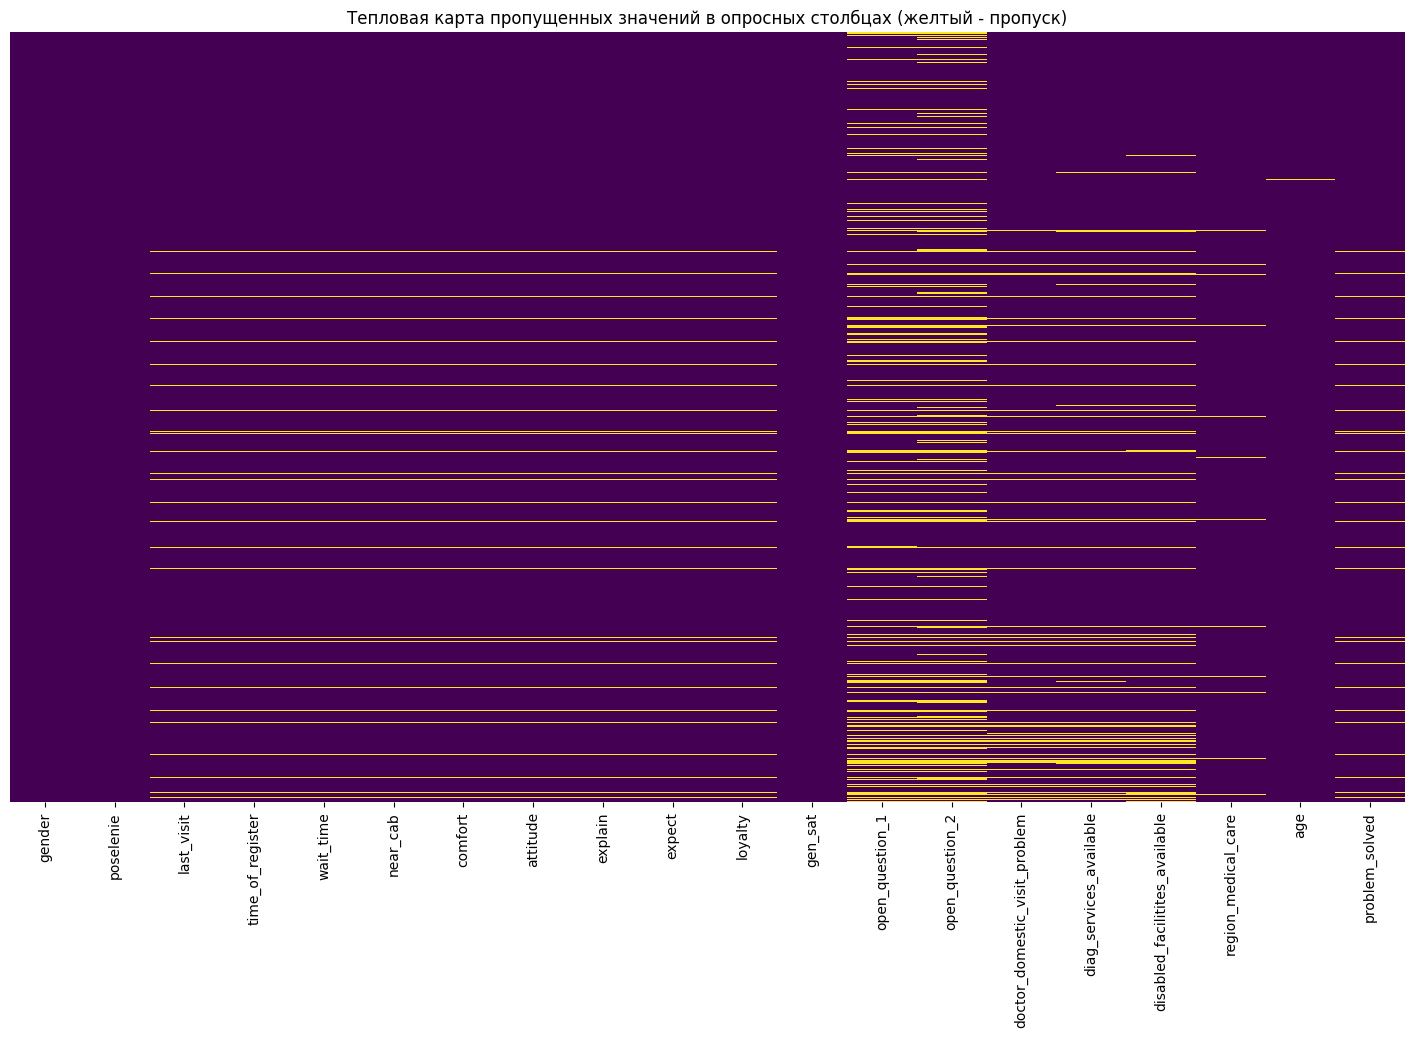

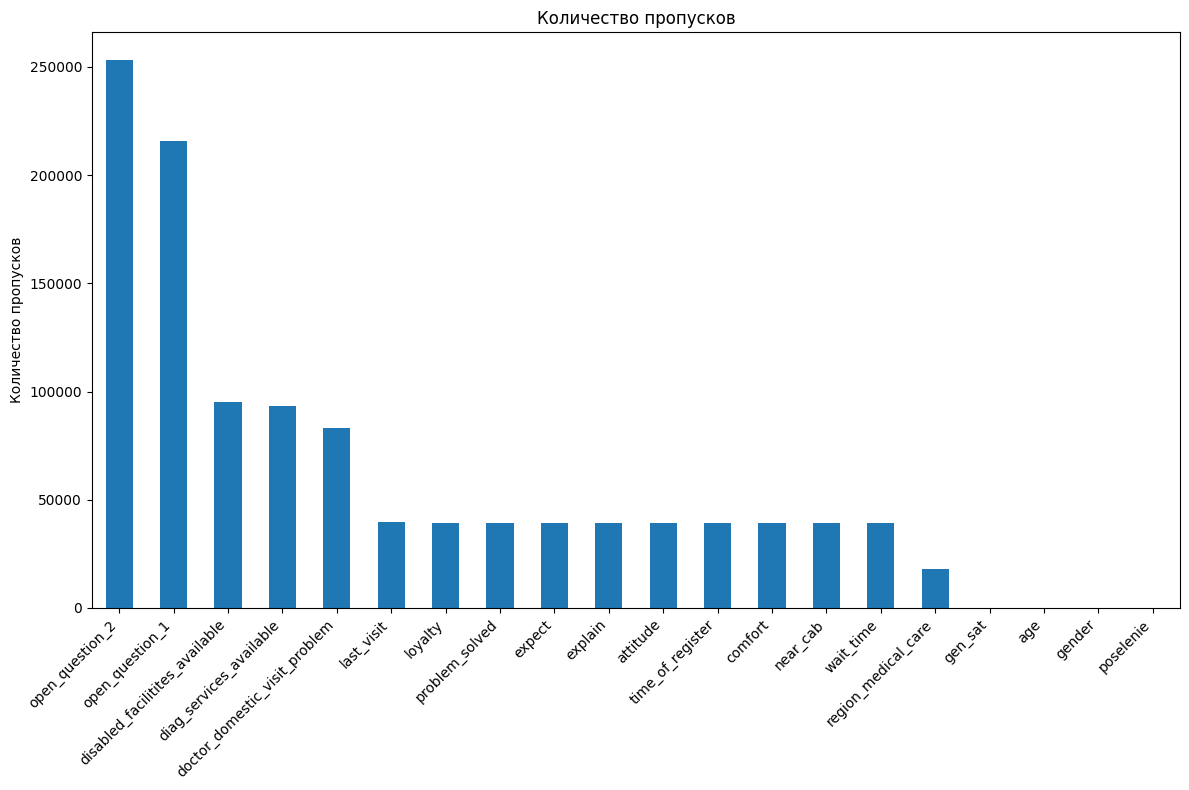

In [34]:
# Посмотрим на пропуски более детально: м.б. строки пустые целиком (т.е. мусор), 
# либо респонденты не ответили на вопросы после того, как посатвили низкую оценку по одному из вопросов (1-2)
df_analysis = df.copy()
# Столбцы, которые НЕ являются оценочными/опросными
id_cols = ['Регион', 'Календарный_год', 'Период', 'date_of_survey', 'respondent_number', 'Населенный_пункт', 'org_type']
# Опросные/оценочные столбцы (все, кроме id_cols)
survey_cols = [col for col in df_analysis.columns if col not in id_cols]
# --- 2. Визуализация общего распределения пропусков ---
plt.figure(figsize=(18, 10))
sns.heatmap(df_analysis[survey_cols].isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Тепловая карта пропущенных значений в опросных столбцах (желтый - пропуск)')
plt.show()

missing_counts = df_analysis[survey_cols].isnull().sum().sort_values(ascending=False)
missing_counts = missing_counts[missing_counts > 0] # Только столбцы с пропусками

plt.figure(figsize=(12, 8))
missing_counts.plot(kind='bar')
plt.title('Количество пропусков')
plt.ylabel('Количество пропусков')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

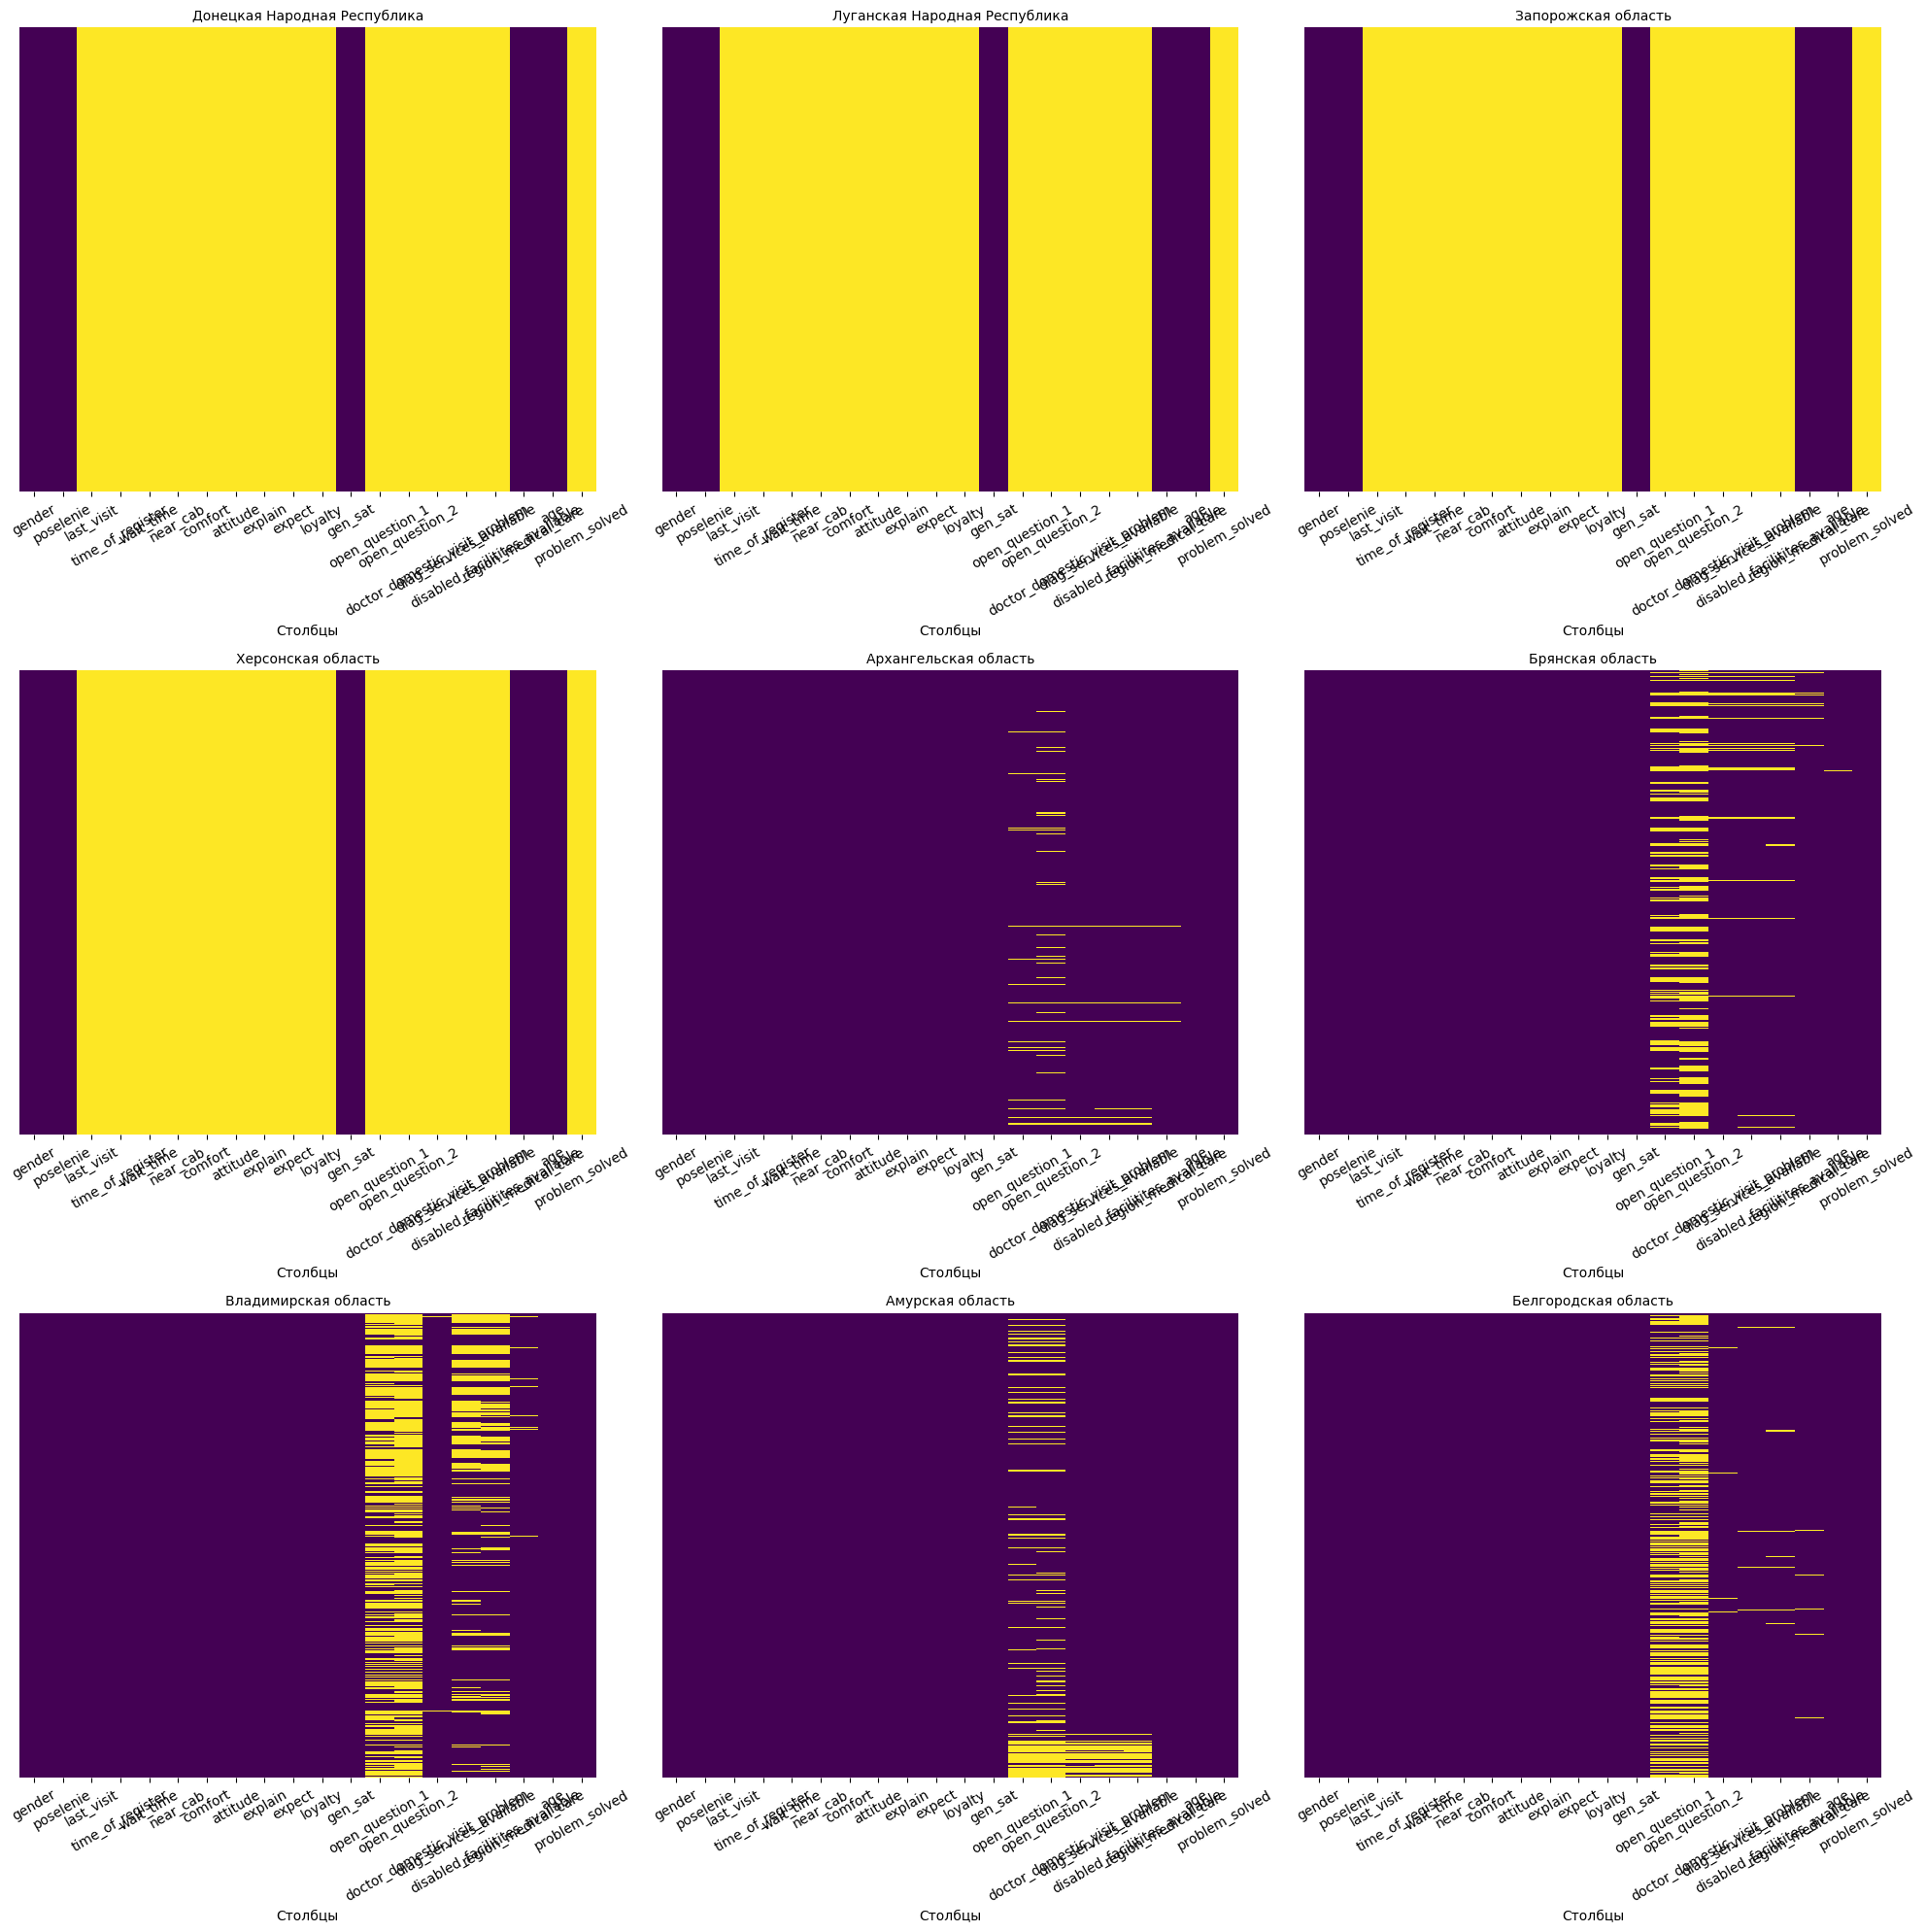

In [35]:
# Получаем топ-16 регионов по количеству пропусков
filtered_df = df[
    (df['Период'] == 1) & 
    (df['Календарный_год'] == 2024)
]
top_regions = filtered_df.groupby('Регион')['problem_solved'].apply(lambda x: x.isna().sum()).sort_values(ascending=False).head(9).index
# Создаем фигуру с 16 subplots (4x4)
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
axes = axes.flatten()

# heatmaps
for idx, region in enumerate(top_regions):
    region_data = df[df['Регион'] == region]
    missing_matrix = region_data[survey_cols].isnull()
    sns.heatmap(missing_matrix, 
                ax=axes[idx],
                cbar=False,
                cmap='viridis',
                yticklabels=False)
    
    axes[idx].set_title(f'{region}', fontsize=10)
    axes[idx].set_xlabel('Столбцы')
    axes[idx].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

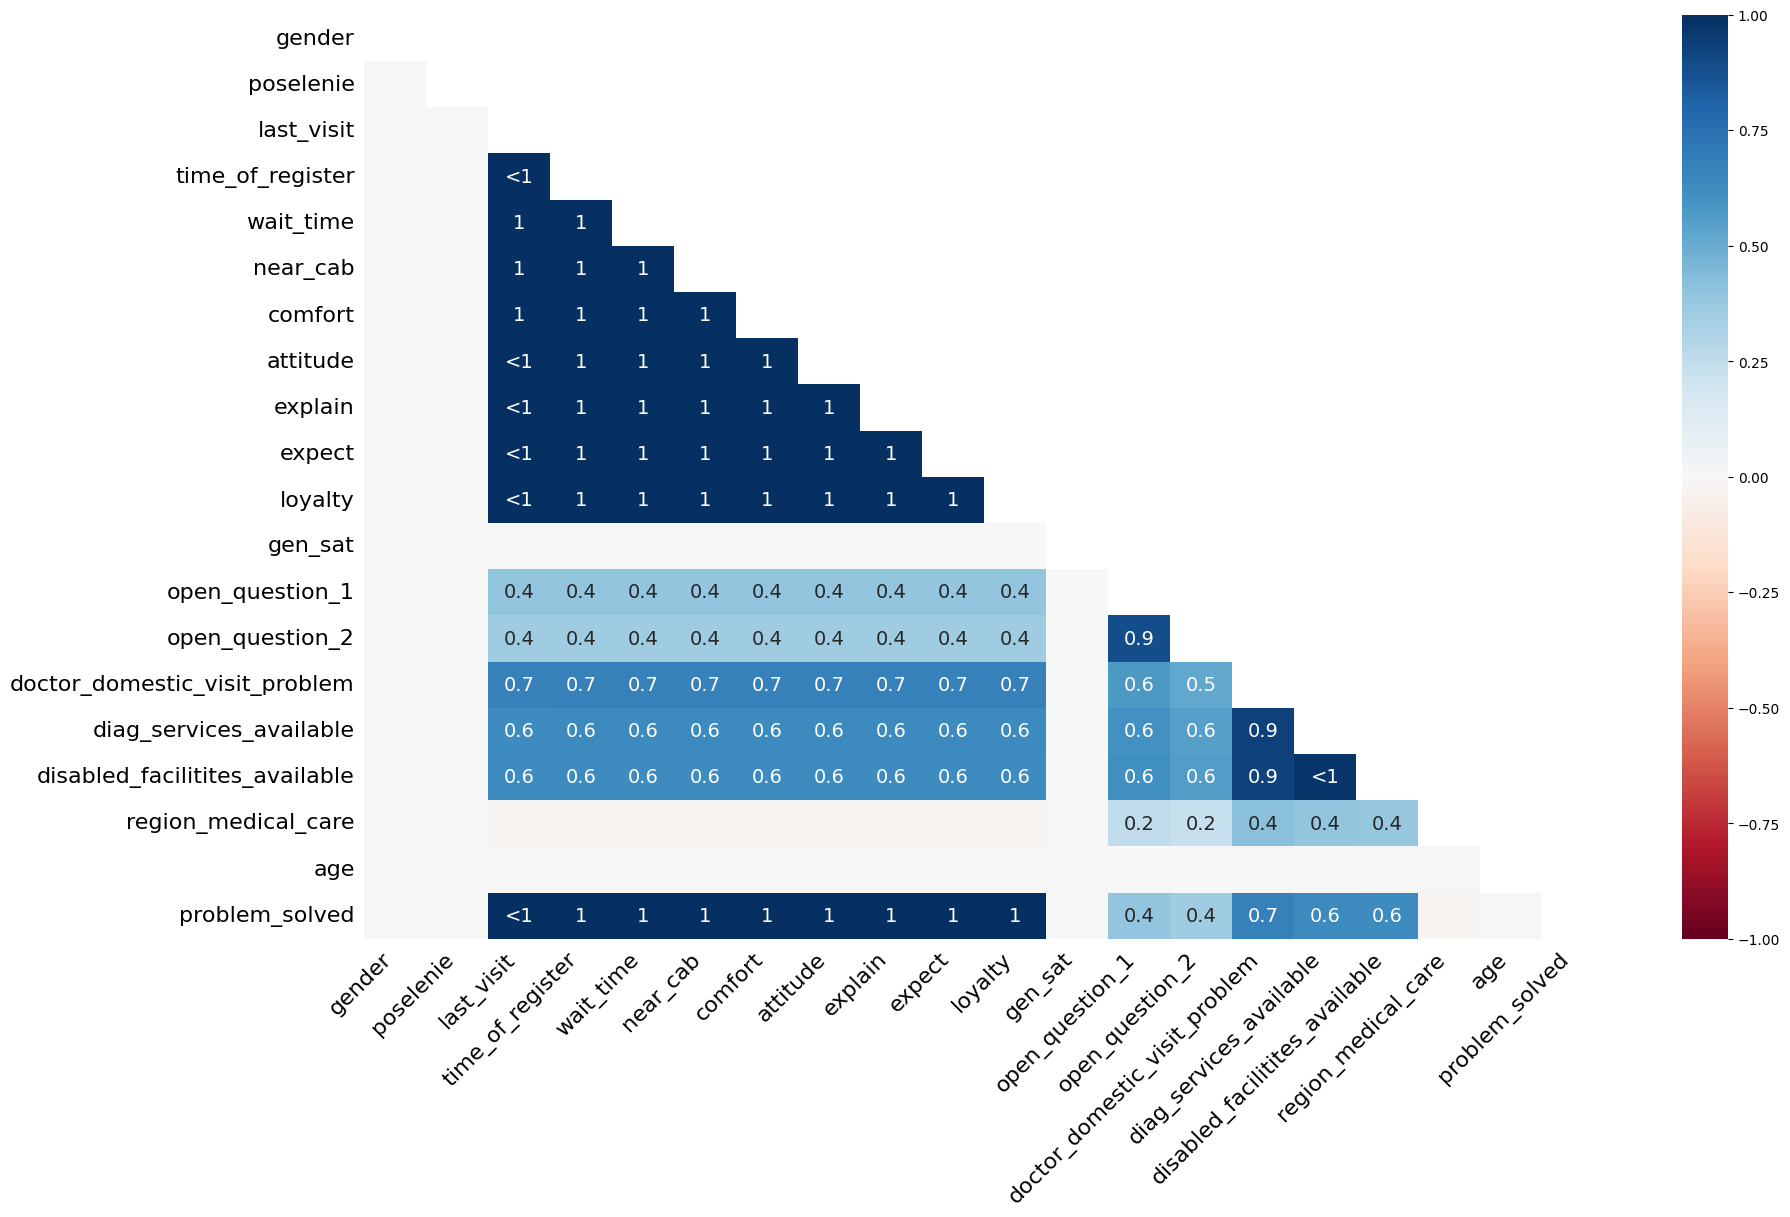

In [36]:
# можно посмтотреть, какие признаки остутствуют вместе, что свидетельствует о полностью пустых строках
import missingno as msno
msno.heatmap(df[survey_cols])
plt.show()

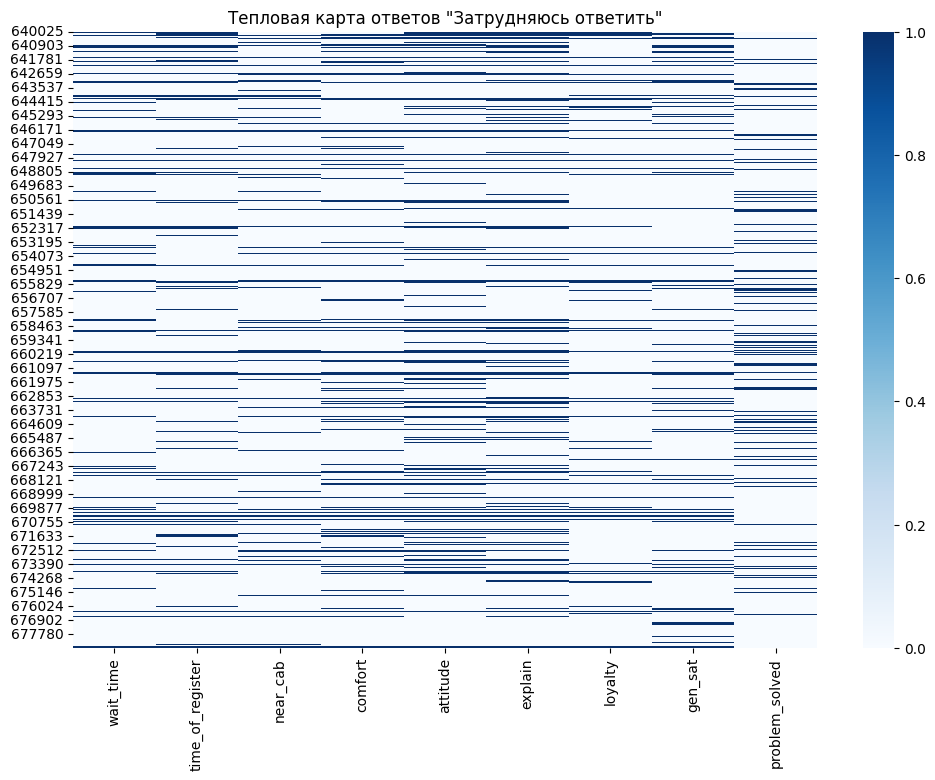

In [38]:
# Посмтотрим на соотношение ответов Затрудняюсь ответить в разных признаках
cols_for_heatmap = [
    'wait_time', 'time_of_register', 'near_cab', 'comfort', 
    'attitude', 'explain', 'loyalty', 'gen_sat', 'problem_solved'
]
# Создаем матрицу, где 1 означает "Затрудняюсь ответить", 0 - другое значение
heatmap_data = filtered_df[cols_for_heatmap].apply(lambda x: x == 'Затрудняюсь ответить').astype(int)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="Blues", cbar=True)
plt.title('Тепловая карта ответов "Затрудняюсь ответить"')
plt.show()



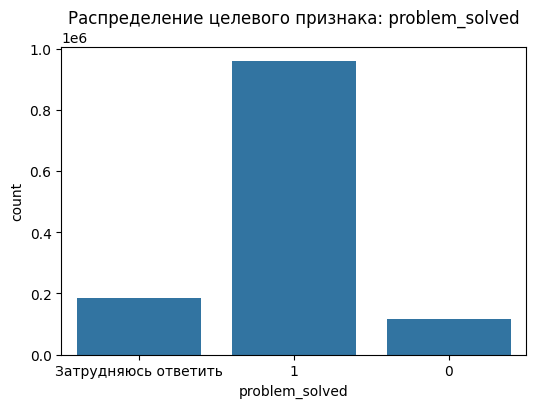

In [39]:
# Распределение целевого признака
plt.figure(figsize=(6, 4))
sns.countplot(x='problem_solved', data=df)
plt.title('Распределение целевого признака: problem_solved')
plt.show()

In [40]:
# TODO дисбаланс
# Разделим данные на классы
df_positive = df[df['problem_solved'] == '1']
df_negative = df[df['problem_solved'] == '0']

# Определим размер меньшего класса
min_class_size = min(len(df_positive), len(df_negative))

# Случайно выберем одинаковое количество примеров из каждого класса
df_positive_sampled = df_positive.sample(n=min_class_size, random_state=42)
df_negative_sampled = df_negative.sample(n=min_class_size, random_state=42)

# Объединим сбалансированные данные
df_balanced = pd.concat([df_positive_sampled, df_negative_sampled])

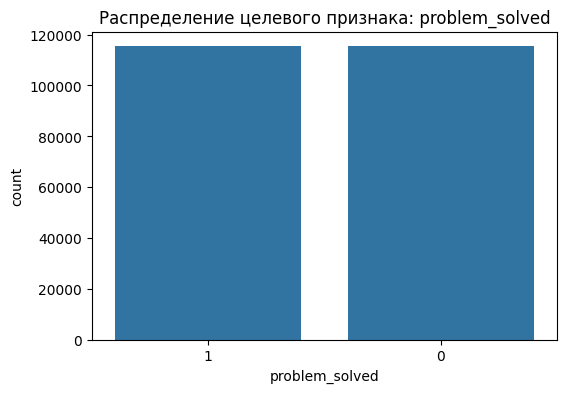

In [41]:
# Распределение целевого признака в сбалансированной выборке

plt.figure(figsize=(6, 4))
sns.countplot(x='problem_solved', data=df_balanced)
plt.title('Распределение целевого признака: problem_solved')
plt.show()

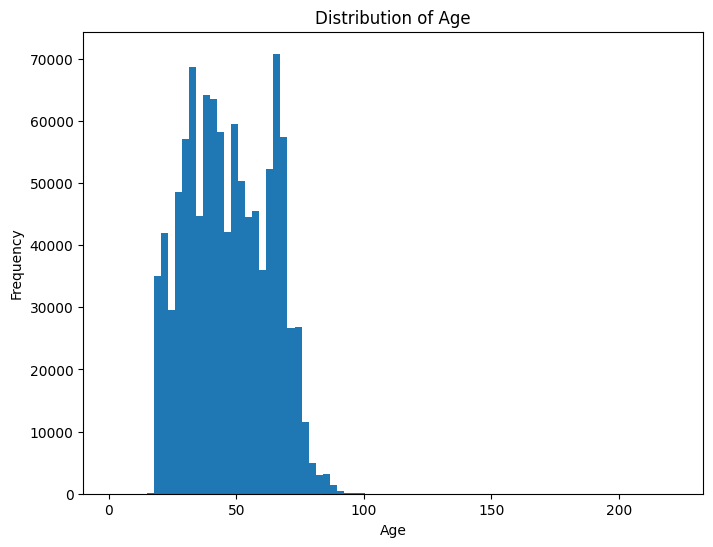

In [111]:
plt.figure(figsize=(8, 6))
df['age'].plot(kind='hist', bins=80)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()



In [50]:
# TODO Можно также посмотреть как меняется возраст в завсисмости от региона и даты



In [112]:
# TODO проверить гипотезу от разной значимости признаков для женщин и мужчин, также для разных возрастов

In [113]:
# TODO могут быть подозрительные данные, когда ту же самую анекету залили в следующем периоде

In [114]:
# TODO доделать преобразование в координаты и создание карты
# df.drop_duplicates(inplace=True)
#df_sample = df.sample(n=10).copy()

In [115]:
'''
# Инициализация геокодера
geolocator = Nominatim(user_agent="geo_example")

# Название села
# location = geolocator.geocode("село Лопатино, Россия")

geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

df_sample['geo_coordinates'] = df_sample['Населенный_пункт'].progress_apply(lambda x: (None, None) if pd.isna(x) else geocode(x))


df_sample['latitude'] = df_sample['geo_coordinates'].progress_apply(lambda loc: loc.latitude if loc else None)
df_sample['longitude'] = df_sample['geo_coordinates'].progress_apply(lambda loc: loc.longitude if loc else None)


display(df_sample.head())


missing_coordinates_count = df_sample['geo_coordinates'].isnull().sum()
print(f"\nNumber of rows with missing coordinates: {missing_coordinates_count}")
'''

'\n# Инициализация геокодера\ngeolocator = Nominatim(user_agent="geo_example")\n\n# Название села\n# location = geolocator.geocode("село Лопатино, Россия")\n\ngeocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)\n\ndf_sample[\'geo_coordinates\'] = df_sample[\'Населенный_пункт\'].progress_apply(lambda x: (None, None) if pd.isna(x) else geocode(x))\n\n\ndf_sample[\'latitude\'] = df_sample[\'geo_coordinates\'].progress_apply(lambda loc: loc.latitude if loc else None)\ndf_sample[\'longitude\'] = df_sample[\'geo_coordinates\'].progress_apply(lambda loc: loc.longitude if loc else None)\n\n\ndisplay(df_sample.head())\n\n\nmissing_coordinates_count = df_sample[\'geo_coordinates\'].isnull().sum()\nprint(f"\nNumber of rows with missing coordinates: {missing_coordinates_count}")\n'

In [116]:
# TODO обработать текст open_question_1 и open_question_2

### Feature Engineering

In [75]:
# 1. Средняя удовлетворенность по всем шкалам
satisfaction_columns = ['time_of_register', 'wait_time', 'near_cab', 'comfort',
                        'attitude', 'explain', 'expect']
df['avg_satisfaction'] = df[satisfaction_columns].mean(axis=1)

# 2. Возрастные группы
# bins = [0, 18, 30, 45, 60, 100]
# labels = ['<18', '18-30', '31-45', '46-60', '>60']
# df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# 3. Месяц из даты опроса
df['date_of_survey'] = pd.to_datetime(df['date_of_survey'], errors='coerce')
df['survey_date_month'] = pd.to_datetime(df['date_of_survey']).dt.month

# 4. Длительность последнего визита (переводим в месяцы)
visit_map = {
    'менее 1 мес. назад': 0.5,
    'от 1 до 3 мес. назад': 2,
    'от 4 до 6 мес. назад': 5,
    'от 7 до 12 мес. назад': 9.5,
    'более 12 мес. назад': 15
}
df['last_visit_months'] = df['last_visit'].map(visit_map)
# проеверить NaN

# 5. Наличие проблем с вызовом врача на дом
df['has_home_visit_problem'] = df['doctor_domestic_visit_problem'].apply(lambda x: 1 if x == 'Да' else 0)

# 6. Есть ли диагностические услуги
df['diag_available'] = df['diag_services_available'].apply(lambda x: 1 if x == 'Да' else 0)

# 7. Наличие удобств для инвалидов
df['disabled_facilities'] = df['disabled_facilitites_available'].apply(lambda x: 1 if x == 'Да' else 0)

# 8. Город/село
df['is_urban'] = df['poselenie'].map({'Город': 1, 'Село': 0})

# 9. Частота обращений (обратная величина last_visit_months)
df['visit_frequency'] = 1 / (df['last_visit_months'] + 0.1)

# 10. Тип организации (государственная или нет)
df['org_type'] = df['org_type'].fillna('Преимущественно в государственных')
df['is_state_org'] = df['org_type'].str.contains('государственных').astype(int)

In [78]:
df.head()

,Регион,Календарный_год,Период,gender,poselenie,Населенный_пункт,org_type,last_visit,time_of_register,wait_time,near_cab,comfort,attitude,explain,expect,loyalty,gen_sat,open_question_1,open_question_2,date_of_survey,doctor_domestic_visit_problem,diag_services_available,disabled_facilitites_available,region_medical_care,age,problem_solved,avg_satisfaction,age_group,survey_date_month,last_visit_months,has_home_visit_problem,diag_available,disabled_facilities,is_urban,visit_frequency,is_state_org
0,Краснодарский край,2023,Январь,Мужской,Город,Приморско-Ахтарск,Преимущественно в государственных,от 4 до 6 мес. назад,5.000,5.000,5.000,6.000,6.000,6.000,5.000,6.000,6,-,-,2023-01-23,Нет,Да,Да,6.000,61.000,1,5.429,>60,1.000,5.000,0,1,1,1,0.196,1
1,Краснодарский край,2023,Январь,Мужской,Город,Краснодар,Преимущественно в государственных,от 4 до 6 мес. назад,5.000,5.000,5.000,4.000,5.000,5.000,6.000,5.000,5,-,-,2023-01-23,Нет,Да,Да,5.000,67.000,1,5.000,>60,1.000,5.000,0,1,1,1,0.196,1
2,Краснодарский край,2023,Январь,Мужской,Город,Краснодар,Преимущественно в государственных,от 1 до 3 мес. назад,4.000,5.000,5.000,4.000,5.000,5.000,4.000,5.000,5,-,-,2023-01-23,Нет,Да,Да,5.000,71.000,1,4.571,>60,1.000,2.000,0,1,1,1,0.476,1
3,Краснодарский край,2023,Январь,Мужской,Город,Сочи,Только в частных,более 12 мес. назад,5.000,6.000,6.000,6.000,5.000,6.000,6.000,6.000,6,-,-,2023-01-23,Не пользовался данной услугой,Да,Да,6.000,33.000,1,5.714,31-45,1.000,15.000,0,1,1,1,0.066,0
4,Краснодарский край,2023,Январь,Мужской,Город,Туапсе,Преимущественно в государственных,от 4 до 6 мес. назад,5.000,6.000,5.000,6.000,6.000,6.000,6.000,5.000,6,-,-,2023-01-23,Нет,Да,Да,6.000,49.000,1,5.714,46-60,1.000,5.000,0,1,1,1,0.196,1


### Baseline модель

In [86]:
# Удаление лишних столбцов
X = df.drop(columns=['poselenie', 'org_type', 'problem_solved', 'open_question_1', 'open_question_2', 'date_of_survey', 'doctor_domestic_visit_problem', 'diag_services_available', 'disabled_facilitites_available', 'last_visit', 'Период', 'gender', 'Населенный_пункт'])
y = df['problem_solved']

categorical_cols = ['Регион', 'time_of_register', 'wait_time', 'near_cab', 'comfort', 'attitude', 'explain', 'expect', 'loyalty', 'gen_sat', 'region_medical_care', 'survey_date_month', 'last_visit_months', 'has_home_visit_problem', 'diag_available', 'disabled_facilities', 'is_urban', 'is_state_org']
numerical_cols = ['age', 'avg_satisfaction', 'visit_frequency']


target_encoder = Pipeline([
    ('wrapper', PolynomialWrapper(TargetEncoder())) 
])

preprocessor = ColumnTransformer([
    ('num', SimpleImputer(strategy='median'), numerical_cols),
    ('cat', SimpleImputer(strategy='most_frequent'), categorical_cols[1:]),
    ('target', target_encoder, ['Регион'])
])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)),
])

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [88]:
X_train_prepared = pipeline.fit_transform(X_train, y_train)
X_test_prepared = pipeline.transform(X_test)

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [89]:
X_train_prepared.shape

(132161, 21)

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.41      0.52      3167
           1       0.94      0.99      0.96     29874

    accuracy                           0.93     33041
   macro avg       0.84      0.70      0.74     33041
weighted avg       0.92      0.93      0.92     33041

ROC AUC Score: 0.8955074844501627


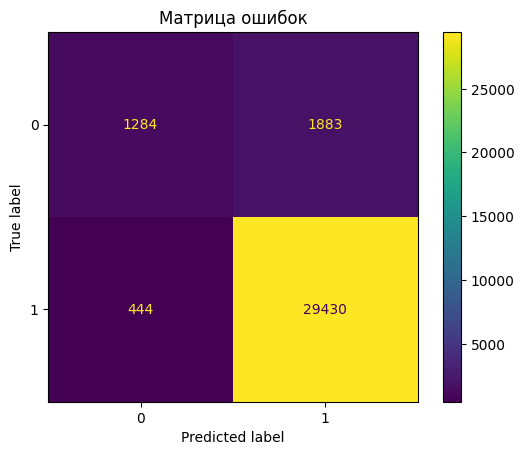

In [91]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_prepared, y_train)
y_pred = model.predict(X_test_prepared)
y_proba = model.predict_proba(X_test_prepared)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

ConfusionMatrixDisplay.from_estimator(model, X_test_prepared, y_test)
plt.title("Матрица ошибок")
plt.show()

In [ ]:
# добавить подбор гиперпараметров

In [ ]:
# TODO Графики ROC-AUC, PR AUC, гистограмма скоров, precision, recall, f1-score от порога, f01, f05, f2, f5. Какая b на что обращает больше внимание (MLFLOW)

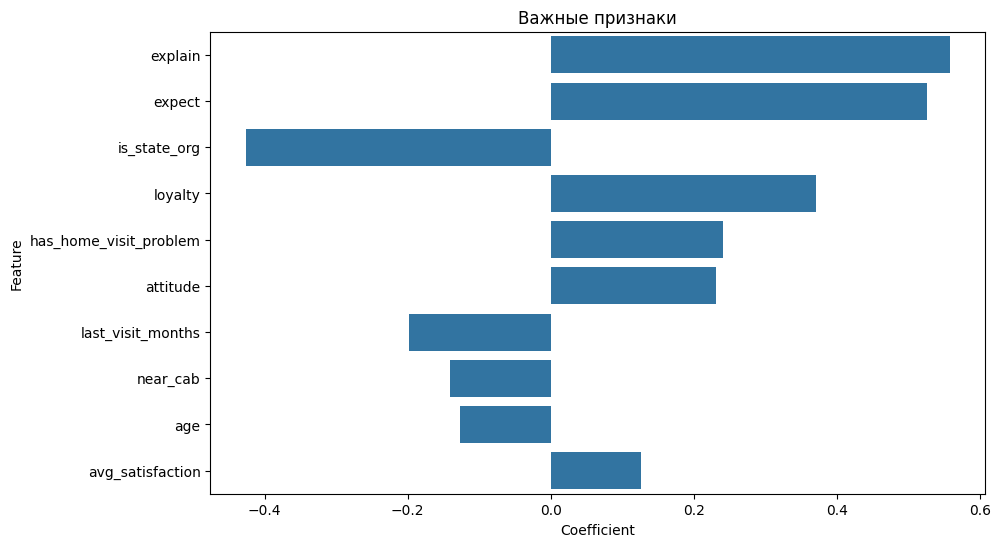

In [93]:
top_features = numerical_cols + categorical_cols

coefs = model.coef_[0]
coef_df = pd.DataFrame(zip(top_features, coefs), columns=["Feature", "Coefficient"])
coef_df["abs_coef"] = coef_df["Coefficient"].abs()
coef_df = coef_df.sort_values(by="abs_coef", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x="Coefficient", y="Feature", data=coef_df)
plt.title("Важные признаки")
plt.show()

In [95]:
mlflow.set_tracking_uri("http://127.0.0.1:5000/") 
mlflow.set_experiment("Medical_Survey_Analysis")

with mlflow.start_run():
    mlflow.log_param("model_type", "LogisticRegression")
    mlflow.log_metric("roc_auc", roc_auc_score(y_test, y_proba))
    mlflow.log_metric("accuracy", model.score(X_test_prepared, y_test))
    
    # Сохраняем модель
    mlflow.sklearn.log_model(model, "model")

2025/05/24 09:00:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run capable-conch-73 at: http://127.0.0.1:5000/#/experiments/428328559253118491/runs/813cd1e902b94f0196f2c75be1bff4c3
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/428328559253118491


In [ ]:
# TODO написать функцию для передачи модели в mlflow

In [ ]:
# TODO обучать модель внутри контекта